In [1]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras as K, nn

In [2]:
y, sr = sf.read('training-lax_no_presence.wav', dtype='float32')

In [3]:
y

array([0.0163269 , 0.01556396, 0.0163269 , ..., 0.00238037, 0.00305176,
       0.00323486], dtype=float32)

In [4]:
sr

16000

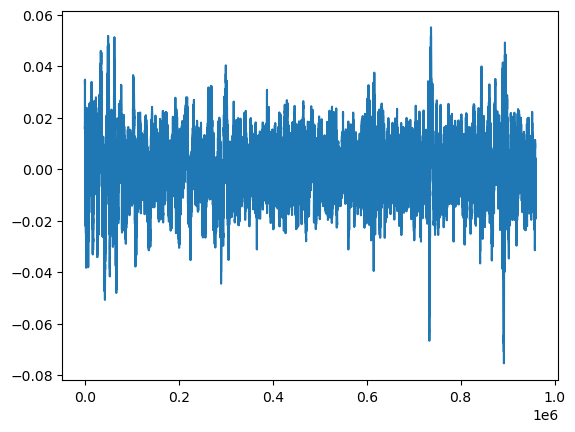

In [5]:
plt.plot(range(0, 960000), y)

In [6]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        if(i+n > len(lst)):
            return
        yield lst[i:i + n]
        


In [7]:
data_np = np.asarray(list(chunks(y, 4000)))
labels_np = np.zeros(len(data_np))

In [8]:
y2, sr2 = sf.read('training-lax_presence.wav', dtype='float32')
data_p = np.asarray(list(chunks(y2, 4000)))
labels_p = np.ones(len(data_p))

In [9]:
data_p.shape

(240, 4000)

In [10]:
data_final = np.concatenate((data_np, data_p))
labels_final = np.concatenate((labels_np, labels_p))

In [11]:
train_data, validation_data, train_labels, validation_labels= train_test_split(data_final, labels_final, test_size=0.2, shuffle=True)

In [12]:
train_data.shape

(384, 4000)

In [13]:
# Reshape data for Conv1D
train_data_reshaped = train_data.reshape(-1, train_data.shape[1], 1)
validation_data_reshaped = validation_data.reshape(-1, validation_data.shape[1], 1)

#model = K.models.Sequential()
#model.add(K.layers.Conv1D(filters=10, kernel_size=12, activation='relu', input_shape=(train_data.shape[1], 1)))
#model.add(K.layers.MaxPool1D(pool_size=2))
#model.add(K.layers.Conv1D(filters=8, kernel_size=4, activation='relu'))
#model.add(K.layers.MaxPool1D(pool_size=2))
#model.add(K.layers.Flatten())
#model.add(K.layers.Dense(32, activation='relu'))
#model.add(K.layers.Dense(1, activation='sigmoid'))

model = K.models.Sequential()
model.add(K.layers.Conv1D(filters=1, kernel_size=2, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(K.layers.MaxPool1D(pool_size=2))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(2, activation='relu'))
model.add(K.layers.Dense(1, activation='sigmoid'))

model.summary()

/opt/anaconda3/envs/aienv2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3999, 1)        │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1999, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1999)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,006 (15.65 KB)

 Trainable params: 4,006 (15.65 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3999, 1)        │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1999, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1999)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,006 (15.65 KB)

 Trainable params: 4,006 (15.65 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), epochs=5, verbose=1)

Epoch 1/5
